In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./요리_와인.csv')

In [10]:
titles = list(df['title'].unique())

In [13]:
for title in titles:
    print(title," : ",len(df[df['title'] == title]))

요리하는 다이어터의 맛있게 살 빼는 다이어트 레시피  :  14
삐뽀삐뽀 119 이유식  :  46
튼이 이유식  :  141
백종원이 추천하는 집밥 메뉴(애장판)  :  103
사계절 맛있는 솥밥 보양식  :  44
맛있어서 지속 가능한 디디미니 다이어트 레시피  :  54
와인 폴리(매그넘 에디션)(리커버)  :  75
맛있는 게 좋아서 양조절 다이어트  :  3
아이주도 이유식 유아식 매뉴얼 세트  :  17
더 쉬운 가성비 집밥  :  2
-18kg 다이어트 김밥  :  7
샐러드에 반하다  :  5
이정현의 집밥레스토랑  :  75
나의 프랑스식 샐러드  :  40
슈가레인 카페 디저트 클래스  :  35
만원으로 일주일 반찬 만들기  :  68
채소 마스터 클래스  :  15
모던 이탈리아 디저트  :  3
김밀란 파스타  :  22


In [15]:
# 제일 많은 리뷰를 가지고 있는 책
df = df[df['title'] == '튼이 이유식']

In [16]:
df.shape

(141, 6)

In [17]:
df.isnull().sum()

Unnamed: 0    0
part          0
title         0
date          0
rating        0
text          0
dtype: int64

In [34]:
# 별점과 텍스트만 남기기
df = df[['rating', 'text']]
df

,rating,text
60,3,그래 24에서 구매하면 이유식 노트주네요 늦게 봐서.. 지금 여기서 구매예정이신분들...
61,4,소유* 이유식은 레스토랑 같다면 튼이이유식은 집밥이랄까요? 가장 현실적이고 합리적인...
62,4,"요리를 전혀 못해서 이유식 만드는 게 큰 부담이었어요. 그런데 쌀가루, 큐브, 밥솥..."
63,4,책 3권 샀는데 그중 가장 과정설명이 자세하네요. 단 쌀가루 중심으로 되어있어 불린...
64,4,이유식 문외한이었는데 이책으로 이유식 시판안먹이고 끝까지 했네요 도움 많이 됐습니다.
...,...,...
196,4,아기에게 정성스레 이유식을 만들어 먹이는 엄마의 마음이 드러나는 책이에요 :) 음식...
197,4,식단표와 음식 궁합이 나와 있어서 유용해요ㅎ
198,4,"재료준비, 요리법 다 좋지만 무엇보다 뭘 만들어야 할지 정해줘서 좋아요!"
199,3,내용도좋고 다좋는데 요리책이다보니 물 떨어지면 찢어질거같아서 조심조심


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 60 to 200
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  141 non-null    int64 
 1   text    141 non-null    object
dtypes: int64(1), object(1)
memory usage: 7.4+ KB


## 정규 표현식

In [23]:
# 정규 표현식 함수 정의

import re

def apply_regular_expression(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = hangul.sub('', text)  # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result

In [37]:
df['text'][60] # index 60부터 시작

'그래 24에서 구매하면 이유식 노트주네요 늦게 봐서.. 지금 여기서 구매예정이신분들은 그래 24로 가서 구매하세요'

In [38]:
apply_regular_expression(df['text'][60])

'그래 에서 구매하면 이유식 노트주네요 늦게 봐서 지금 여기서 구매예정이신분들은 그래 로 가서 구매하세요'

## 한국어 형태소 분석 - 명사 단위

In [33]:
from konlpy.tag import Okt
from collections import Counter

In [39]:
okt = Okt()  # 명사 형태소 추출 함수
nouns = okt.nouns(apply_regular_expression(df['text'][60]))
nouns

['구매', '이유식', '노트', '주네', '지금', '여기', '구매', '예정', '이신', '로', '구매']

In [47]:
# 말뭉치 생성
corpus = "".join(df['text'].tolist())
corpus

"그래 24에서 구매하면 이유식 노트주네요 늦게 봐서.. 지금 여기서 구매예정이신분들은 그래 24로 가서 구매하세요소유* 이유식은 레스토랑 같다면 튼이이유식은 집밥이랄까요? 가장 현실적이고 합리적인 이유식책 같아요. 너무 쉬워서 요리멍충이도 아주 쉽게 한답니다. 앞으로 이유식책은 무조건 튼이이유식이 될 것 같네요요리를 전혀 못해서 이유식 만드는 게 큰 부담이었어요. 그런데 쌀가루, 큐브, 밥솥칸막이로 쉽고 간단히 만드는 방법을 알려준다고 해서 이 책이 끌렸습니다. 책을 읽어보니 정말 쉽게 따라할 수 있겠더라고요. 저 같은 초보 엄마들에게 적극 추천합니다!^^책 3권 샀는데 그중 가장 과정설명이 자세하네요. 단 쌀가루 중심으로 되어있어 불린쌀 사용중인 저는 좀 물 양을 어떻게 해야하는지 헤깔렸네요. 그래도 다른책들보다 꼼꼼한 설명으로 많이 되요. 큐야채 고기 손질및 큐브보관 방법도 나와있고 실용적인 책입니다.이유식 문외한이었는데 이책으로 이유식 시판안먹이고 끝까지 했네요 도움 많이 됐습니다.이유식 쉽게 만들 수 있는 책 찾다가 구매하게 되었어요. 만드는 방법도 간편해서 좋은 것 같아요아기가 아직 이유식 먹기 전이지만 지인 추천으로 샀어요~ 기대되어요~^^언니한테 선물했어요 ㅎㅎ 좋아하네요최근 개정된 이유식 흐름에 맞춰 내용이 간결하고 쉽게 따라할 수 있도록 잘 구성돼 있네요~ 마냥 어렵게만 생각했는데 이 책 보면서 잘 따라해볼거 같아요^^이유식 시작하려고 샀어요. 유용한 정보가 많아서 좋아요처음 시작하는 이유식 입문서로 유용해요유용합니다 추천해요이유식을 먹어야할 시기에 어떻게 해야할지 막막했는데 이 책을 읽으면서 식단과 방법 등 많은 도움이 됐습니다이유식 처음 시작할때 가장 따라하기 쉽게 되어있는거 같아요 책 보면서 많은 도움이 되었어요오랫동안 베스트인 이유가 있겠죠?!잘 봤어요 이유식 잘 만들었어요너무쉽게 잘정리되어있어서 좋았어요좋아요~ 잘 모르는 이유식의 세계는 이 책만 있으면 오케이! 이유식 끝판왕잘 읽어보고 이유식 준비를 해볼예정이에요!아주 아주 좋아요.

In [48]:
# 정규 표현식 적용
apply_regular_expression(corpus)

'그래 에서 구매하면 이유식 노트주네요 늦게 봐서 지금 여기서 구매예정이신분들은 그래 로 가서 구매하세요소유 이유식은 레스토랑 같다면 튼이이유식은 집밥이랄까요 가장 현실적이고 합리적인 이유식책 같아요 너무 쉬워서 요리멍충이도 아주 쉽게 한답니다 앞으로 이유식책은 무조건 튼이이유식이 될 것 같네요요리를 전혀 못해서 이유식 만드는 게 큰 부담이었어요 그런데 쌀가루 큐브 밥솥칸막이로 쉽고 간단히 만드는 방법을 알려준다고 해서 이 책이 끌렸습니다 책을 읽어보니 정말 쉽게 따라할 수 있겠더라고요 저 같은 초보 엄마들에게 적극 추천합니다책 권 샀는데 그중 가장 과정설명이 자세하네요 단 쌀가루 중심으로 되어있어 불린쌀 사용중인 저는 좀 물 양을 어떻게 해야하는지 헤깔렸네요 그래도 다른책들보다 꼼꼼한 설명으로 많이 되요 큐야채 고기 손질및 큐브보관 방법도 나와있고 실용적인 책입니다이유식 문외한이었는데 이책으로 이유식 시판안먹이고 끝까지 했네요 도움 많이 됐습니다이유식 쉽게 만들 수 있는 책 찾다가 구매하게 되었어요 만드는 방법도 간편해서 좋은 것 같아요아기가 아직 이유식 먹기 전이지만 지인 추천으로 샀어요 기대되어요언니한테 선물했어요 ㅎㅎ 좋아하네요최근 개정된 이유식 흐름에 맞춰 내용이 간결하고 쉽게 따라할 수 있도록 잘 구성돼 있네요 마냥 어렵게만 생각했는데 이 책 보면서 잘 따라해볼거 같아요이유식 시작하려고 샀어요 유용한 정보가 많아서 좋아요처음 시작하는 이유식 입문서로 유용해요유용합니다 추천해요이유식을 먹어야할 시기에 어떻게 해야할지 막막했는데 이 책을 읽으면서 식단과 방법 등 많은 도움이 됐습니다이유식 처음 시작할때 가장 따라하기 쉽게 되어있는거 같아요 책 보면서 많은 도움이 되었어요오랫동안 베스트인 이유가 있겠죠잘 봤어요 이유식 잘 만들었어요너무쉽게 잘정리되어있어서 좋았어요좋아요 잘 모르는 이유식의 세계는 이 책만 있으면 오케이 이유식 끝판왕잘 읽어보고 이유식 준비를 해볼예정이에요아주 아주 좋아요아기 이유식해주려고 구매했는데 도움이 많이 되네요 만드는 방법 설명이 

In [49]:
# 전체 말뭉치(corpus)에서 명사 형태소 추출
nouns = okt.nouns(apply_regular_expression(corpus))
print(nouns)

['구매', '이유식', '노트', '주네', '지금', '여기', '구매', '예정', '이신', '로', '구매', '소유', '이유식', '레스토랑', '이유식', '집밥', '랄', '가장', '현실', '합리', '이유식', '책', '요리', '멍충', '아주', '앞', '이유식', '책', '무조건', '이유식', '것', '요리', '전혀', '이유식', '게', '부담', '쌀', '가루', '큐브', '밥솥', '칸막이', '방법', '이', '책', '책', '정말', '수', '저', '초보', '엄마', '적극', '추천', '책', '권', '가장', '과정', '설명', '단', '쌀', '가루', '중심', '쌀', '사용', '저', '좀', '물', '양', '헤', '책', '설명', '큐', '야채', '고기', '손질', '및', '큐브', '보관', '방법', '실용', '책', '이유식', '문외한', '책', '이유식', '시판', '끝', '도움', '이유식', '수', '책', '구매', '방법', '것', '아기', '이유식', '먹기', '전이', '지인', '추천', '어요', '선물', '최근', '개정', '이유식', '흐름', '내용', '수', '구성', '마냥', '생각', '이', '책', '이유식', '시작', '정보', '처음', '시작', '이유식', '입문', '서로', '추천', '이유식', '시기', '이', '책', '식단', '방법', '등', '도움', '이유식', '처음', '시작', '때', '가장', '책', '도움', '베스트', '이유', '이유식', '정리', '이유식', '세계', '이', '책', '오케이', '이유식', '끝판', '보고', '이유식', '준비', '예정', '아주', '아주', '아기', '이유식', '구매', '도움', '방법', '설명', '지인', '추천', '구매', '요리', '저', '수', '배송', '갑사', '추천', '책', '이

In [51]:
# 빈도 탐색
counter = Counter(nouns)
counter

Counter({'구매': 19,
         '이유식': 126,
         '노트': 1,
         '주네': 1,
         '지금': 2,
         '여기': 1,
         '예정': 2,
         '이신': 1,
         '로': 1,
         '소유': 1,
         '레스토랑': 1,
         '집밥': 1,
         '랄': 1,
         '가장': 3,
         '현실': 1,
         '합리': 1,
         '책': 51,
         '요리': 9,
         '멍충': 1,
         '아주': 5,
         '앞': 2,
         '무조건': 1,
         '것': 8,
         '전혀': 1,
         '게': 1,
         '부담': 4,
         '쌀': 5,
         '가루': 3,
         '큐브': 5,
         '밥솥': 5,
         '칸막이': 2,
         '방법': 8,
         '이': 6,
         '정말': 8,
         '수': 14,
         '저': 5,
         '초보': 10,
         '엄마': 9,
         '적극': 1,
         '추천': 13,
         '권': 1,
         '과정': 3,
         '설명': 24,
         '단': 1,
         '중심': 1,
         '사용': 2,
         '좀': 2,
         '물': 3,
         '양': 1,
         '헤': 1,
         '큐': 1,
         '야채': 1,
         '고기': 1,
         '손질': 4,
         '및': 1,
         '보관': 

In [52]:
# 빈도수 top10
counter.most_common(10)

[('이유식', 126),
 ('책', 51),
 ('도움', 32),
 ('시작', 26),
 ('설명', 24),
 ('구매', 19),
 ('수', 14),
 ('아기', 14),
 ('추천', 13),
 ('준비', 12)]

### 한글자 명사 제거
위 결과에서 보이듯이, 두 글자 키워드가 대부분 의미 있는 단어지만, ‘수’, ‘것’, '곳’과 같은 한 글자 키워드는 분석에 딱히 좋은 영향을 미치지 않은 것으로 보입니다. 그래서 우리는 한글자 명사를 제거해보도록 하겠습니다.

In [53]:
available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter.most_common(10)

[('이유식', 126),
 ('도움', 32),
 ('시작', 26),
 ('설명', 24),
 ('구매', 19),
 ('아기', 14),
 ('추천', 13),
 ('준비', 12),
 ('초보', 10),
 ('요리', 9)]

# 불용어 사전

In [54]:
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
stopwords[:10]

[['휴'],
 ['아이구'],
 ['아이쿠'],
 ['아이고'],
 ['어'],
 ['나'],
 ['우리'],
 ['저희'],
 ['따라'],
 ['의해']]

이 외에도 우리가 분석하고자 하는 데이터셋에 특화된 불용어들이 있습니다. 예를 들면: '이유식', '요리', '구매', '아기' 등. 이런 단어들도 불용어 사전에 추가해보도록 할게요.

In [55]:
cooking_stopwords = ['이유식', '요리', '구매', '아기']
for word in cooking_stopwords:
    stopwords.append(word)

# Word Count
## BoW

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 정규 표현식 처리
    result = hangul.sub('', text)
    okt = Okt()  # 형태소 추출
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거
    return nouns

vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
bow_vect = vect.fit_transform(df['text'].tolist())
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)

In [61]:
# 단어 리스트
word_list

['가루',
 '가이드',
 '가장',
 '각종',
 '감사',
 '갑사',
 '강조',
 '개월',
 '개정',
 '거의',
 '걱정',
 '겨우',
 '계산',
 '계속',
 '고기',
 '고민',
 '과연',
 '과정',
 '관련',
 '구성',
 '구입',
 '국민',
 '궁합',
 '그냥',
 '그대로',
 '기대',
 '기도',
 '기본',
 '기억',
 '기준',
 '끝판',
 '내용',
 '내용정리',
 '냉장고',
 '노트',
 '다른',
 '다만',
 '단계',
 '달력',
 '대응',
 '대한',
 '대해',
 '덕분',
 '도서',
 '도우',
 '도움',
 '도전',
 '독서',
 '동생',
 '두려움',
 '둘째',
 '듬뿍',
 '때문',
 '뚝딱',
 '라며',
 '레스토랑',
 '레시피',
 '려고',
 '마냥',
 '마음',
 '만들기',
 '매달',
 '매우',
 '먹기',
 '멍충',
 '메뉴',
 '며칠',
 '몇번',
 '몇장',
 '모두',
 '무엇',
 '무조건',
 '문외한',
 '미리',
 '믿음',
 '바로',
 '바이블',
 '반복',
 '발생',
 '밥솥',
 '방법',
 '배송',
 '법도',
 '베스트',
 '별거',
 '별로',
 '보고',
 '보관',
 '보기',
 '복직',
 '부담',
 '부디',
 '부리',
 '부모',
 '부분',
 '부연',
 '붙이',
 '비교',
 '비롯',
 '사고',
 '사서',
 '사용',
 '사지',
 '사진',
 '상황',
 '생각',
 '서도',
 '서로',
 '서하',
 '선물',
 '선택',
 '설명',
 '성공',
 '세계',
 '소유',
 '손질',
 '술술',
 '스레',
 '스케줄',
 '스케쥴',
 '시기',
 '시작',
 '시판',
 '식단',
 '실용',
 '실제',
 '실질',
 '쏙쏙',
 '아가',
 '아이',
 '아주',
 '안내',
 '야채',
 '어려움',
 '언니',
 '엄마',
 '여기',
 '여러가지',
 '열심',
 '영양',
 

In [62]:
# 각 단어가 전체 리뷰중에 등장한 총 횟수
count_list

array([ 3,  2,  3,  1,  1,  1,  1,  2,  1,  1,  5,  1,  1,  1,  1,  3,  1,
        3,  2,  1,  9,  2,  2,  2,  3,  1,  1,  2,  1,  1,  1,  7,  1,  1,
        1,  3,  1,  1,  1,  1,  4,  3,  3,  2,  1, 32,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  9,  3,  1,  3,  2,  1,  2,  1,  1,  2,  1,  1,
        1,  1,  2,  1,  1,  3,  1,  1,  1,  1,  1,  5,  8,  1,  1,  1,  3,
        1,  7,  2,  7,  1,  4,  1,  1,  1,  3,  1,  1,  1,  1,  1,  3,  2,
        1,  2,  2,  4,  1,  1,  1,  5,  1, 24,  1,  2,  1,  4,  1,  1,  2,
        1,  1, 26,  4,  6,  2,  2,  1,  1,  1,  7,  5,  1,  1,  2,  1,  9,
        1,  2,  1,  1,  2,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        2,  3,  1,  1,  2,  1,  3,  1,  2,  2,  1,  1,  3,  1,  1,  7,  1,
        1,  1,  1,  1,  2,  1,  4,  8,  3,  1,  1,  2,  1,  1,  1,  1,  1,
       12,  2,  1,  2,  1,  1,  2,  1,  2,  3,  1,  1,  7,  1,  1,  6,  4,
       10,  1,  1, 13,  2,  5,  1,  1,  1,  1,  3,  1,  1,  1,  2,  1,  3,
        4,  1,  1,  1,  1

In [63]:
# 각 단어의 리뷰별 등장 횟수
bow_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [65]:
bow_vect.shape

(141, 226)

In [66]:
# "단어" - "총 등장 횟수" Matching

word_count_dict = dict(zip(word_list, count_list))
word_count_dict

{'가루': 3,
 '가이드': 2,
 '가장': 3,
 '각종': 1,
 '감사': 1,
 '갑사': 1,
 '강조': 1,
 '개월': 2,
 '개정': 1,
 '거의': 1,
 '걱정': 5,
 '겨우': 1,
 '계산': 1,
 '계속': 1,
 '고기': 1,
 '고민': 3,
 '과연': 1,
 '과정': 3,
 '관련': 2,
 '구성': 1,
 '구입': 9,
 '국민': 2,
 '궁합': 2,
 '그냥': 2,
 '그대로': 3,
 '기대': 1,
 '기도': 1,
 '기본': 2,
 '기억': 1,
 '기준': 1,
 '끝판': 1,
 '내용': 7,
 '내용정리': 1,
 '냉장고': 1,
 '노트': 1,
 '다른': 3,
 '다만': 1,
 '단계': 1,
 '달력': 1,
 '대응': 1,
 '대한': 4,
 '대해': 3,
 '덕분': 3,
 '도서': 2,
 '도우': 1,
 '도움': 32,
 '도전': 1,
 '독서': 1,
 '동생': 1,
 '두려움': 1,
 '둘째': 1,
 '듬뿍': 1,
 '때문': 1,
 '뚝딱': 1,
 '라며': 1,
 '레스토랑': 1,
 '레시피': 9,
 '려고': 3,
 '마냥': 1,
 '마음': 3,
 '만들기': 2,
 '매달': 1,
 '매우': 2,
 '먹기': 1,
 '멍충': 1,
 '메뉴': 2,
 '며칠': 1,
 '몇번': 1,
 '몇장': 1,
 '모두': 1,
 '무엇': 2,
 '무조건': 1,
 '문외한': 1,
 '미리': 3,
 '믿음': 1,
 '바로': 1,
 '바이블': 1,
 '반복': 1,
 '발생': 1,
 '밥솥': 5,
 '방법': 8,
 '배송': 1,
 '법도': 1,
 '베스트': 1,
 '별거': 3,
 '별로': 1,
 '보고': 7,
 '보관': 2,
 '보기': 7,
 '복직': 1,
 '부담': 4,
 '부디': 1,
 '부리': 1,
 '부모': 1,
 '부분': 3,
 '부연': 1,
 '붙이': 1,
 '비교': 1,
 '비롯'

# TF-IDF 적용
- BoW 벡터에 대해서 적용

In [67]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [68]:
print(tf_idf_vect.shape)

(141, 226)


변환 후 1001*3599 matrix가 출력됩니다. 여기서

- 한 행(row)은 한 리뷰를 의미하고

- 한 열(column)은 한 단어를 의미합니다.

In [69]:
# 첫 번째 리뷰에서의 단어 중요도(TF-IDF 값) -- 0이 아닌 것만 출력
print(tf_idf_vect[0])

  (0, 193)	0.386458067505899
  (0, 184)	0.41871837914020804
  (0, 158)	0.41871837914020804
  (0, 140)	0.386458067505899
  (0, 136)	0.41871837914020804
  (0, 34)	0.41871837914020804


In [70]:
# 첫 번째 리뷰에서 모든 단어의 중요도 -- 0인 값까지 포함
print(tf_idf_vect[0].toarray().shape)
print(tf_idf_vect[0].toarray())

(1, 226)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.41871838 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.     

### “벡터” - “단어” mapping

In [71]:
vect.vocabulary_

{'노트': 34,
 '주네': 184,
 '지금': 193,
 '여기': 136,
 '예정': 140,
 '이신': 158,
 '소유': 114,
 '레스토랑': 55,
 '집밥': 197,
 '가장': 2,
 '현실': 219,
 '합리': 216,
 '멍충': 64,
 '아주': 130,
 '무조건': 71,
 '전혀': 173,
 '부담': 90,
 '가루': 0,
 '큐브': 209,
 '밥솥': 79,
 '칸막이': 208,
 '방법': 80,
 '정말': 177,
 '초보': 204,
 '엄마': 135,
 '적극': 169,
 '추천': 207,
 '과정': 17,
 '설명': 111,
 '중심': 191,
 '사용': 101,
 '야채': 132,
 '고기': 14,
 '손질': 115,
 '보관': 87,
 '실용': 124,
 '문외한': 72,
 '시판': 122,
 '도움': 45,
 '먹기': 63,
 '전이': 171,
 '지인': 195,
 '기대': 25,
 '언니': 134,
 '선물': 109,
 '최근': 205,
 '개정': 8,
 '흐름': 224,
 '내용': 31,
 '구성': 19,
 '마냥': 58,
 '생각': 105,
 '시작': 121,
 '정보': 178,
 '처음': 202,
 '입문': 164,
 '서로': 107,
 '시기': 120,
 '식단': 123,
 '베스트': 83,
 '이유': 159,
 '정리': 176,
 '세계': 113,
 '오케이': 141,
 '끝판': 30,
 '보고': 86,
 '준비': 187,
 '배송': 81,
 '갑사': 5,
 '레시피': 56,
 '발생': 78,
 '여러가지': 137,
 '이론': 157,
 '조금': 181,
 '참고': 199,
 '다른': 35,
 '서하': 108,
 '상황': 104,
 '대응': 39,
 '덕분': 42,
 '사지': 102,
 '직접': 196,
 '관련': 18,
 '메뉴': 65,
 '마음': 59,
 '완료': 

In [72]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'...')

{34: '노트', 184: '주네', 193: '지금', 136: '여기', 140: '예정', 158: '이신', 114: '소유', 55: '레스토랑', 197: '집밥', ...


# 감성 분류 – Logistic Regression

In [73]:
df.sample(10)

,rating,text
191,4,좋아요
173,4,유용합니다. 잘 활용 할게요
85,4,이유식을 시작하며 많은 도움이 되었어요.
132,3,요리 초보도 부담없이 이유식에 도전하게 만들어주네요^^
138,4,이제 4개월된 아가 이유식 시작해보려고 구매했습니다. 아직 많이 읽지는 않았지만 쉽...
103,4,이해하기 쉽게 정리가 되어 있어서 좋아요^^ 튼이 이유식만 있으면 이유식 어렵지 않...
78,4,잘 읽어보고 이유식 준비를 해볼예정이에요!
136,4,육아 초보라 이유식에 겁을 내고 있었는데 이 책 덕에 조금은 마음이 놓이네요.
190,4,좋아요
118,4,"첫이유식이라 막막했는데, 내용이 쉽게 잘읽혀서 많은 도움이 됐어요. 국민이유식책인 ..."


<AxesSubplot:>

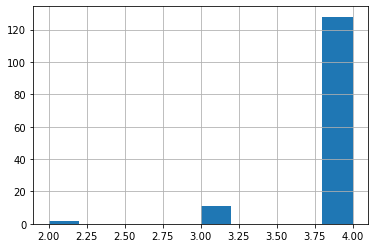

In [74]:
df['rating'].hist()

In [75]:
def rating_to_label(rating):
    if rating > 2:
        return 1
    else:
        return 0
    
df['y'] = df['rating'].apply(lambda x: rating_to_label(x))

In [76]:
df.head()

,rating,text,y
60,3,그래 24에서 구매하면 이유식 노트주네요 늦게 봐서.. 지금 여기서 구매예정이신분들...,1
61,4,소유* 이유식은 레스토랑 같다면 튼이이유식은 집밥이랄까요? 가장 현실적이고 합리적인...,1
62,4,"요리를 전혀 못해서 이유식 만드는 게 큰 부담이었어요. 그런데 쌀가루, 큐브, 밥솥...",1
63,4,책 3권 샀는데 그중 가장 과정설명이 자세하네요. 단 쌀가루 중심으로 되어있어 불린...,1
64,4,이유식 문외한이었는데 이책으로 이유식 시판안먹이고 끝까지 했네요 도움 많이 됐습니다.,1


In [77]:
df["y"].value_counts()

1    139
0      2
Name: y, dtype: int64

# Training set / Test set 나누기

In [78]:
from sklearn.model_selection import train_test_split

x = tf_idf_vect
y = df['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

In [79]:
x_train.shape, y_train.shape

((98, 226), (98,))

In [80]:
x_test.shape, y_test.shape

((43, 226), (43,))

# 모델 학습

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# fit in training set
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

# predict in test set
y_pred = lr.predict(x_test)

In [82]:
# classification result for test set

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

accuracy: 1.00
precision: 1.00
recall: 1.00
F1: 1.00


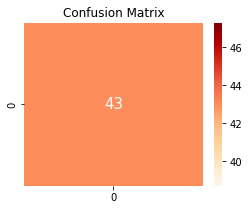

In [83]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()